<a href="https://colab.research.google.com/github/octaviasst/LEARN-CNN/blob/main/HeartPY_Percobaan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### import library, 3rd Party, framework and data

In [21]:
# import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
import warnings
warnings.filterwarnings('ignore')

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
# read dataset SBP 150
P100 = pd.read_csv('/content/drive/MyDrive/CNN-TESIS/RAW-DATA-TEKANAN-DARAH/RAW/p100.csv', header=None) 
# read dataset SBP 100
P114 = pd.read_csv('/content/drive/MyDrive/CNN-TESIS/RAW-DATA-TEKANAN-DARAH/RAW/p114.csv', header=None) 


### analyze heartPy

In [24]:
! python -m pip install heartpy

In [25]:
#First let's import
import heartpy as hp
import matplotlib.pyplot as plt

In [35]:
import heartpy as hp

data = hp.get_data('/content/drive/MyDrive/CNN-TESIS/RAW-DATA-TEKANAN-DARAH/RAW/p100.csv')

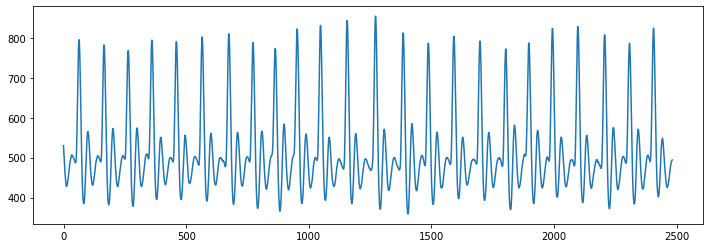

In [40]:
#first let's load the clean PPG signal
data, timer = hp.load_exampledata(0)

#and visualise
plt.figure(figsize=(12,4))
plt.plot(data)
plt.show()

In [27]:
#run the analysis
wd, m = hp.process(data, sample_rate = 100.0)

bpm: 97.325149
ibi: 616.490194
sdnn: 57.916589
sdsd: 30.173744
rmssd: 38.181375
pnn20: 0.320281
pnn50: 0.086345
hr_mad: 29.874613
sd1: 26.997110
sd2: 75.178572
s: 6376.189507
sd1/sd2: 0.359106
breathingrate: 0.141844


<Figure size 864x288 with 0 Axes>

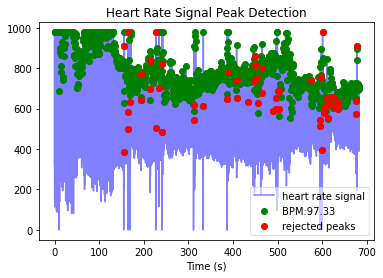

In [42]:
#set large figure
plt.figure(figsize=(12,4))

#call plotter
hp.plotter(wd, m)

#display measures computed
for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

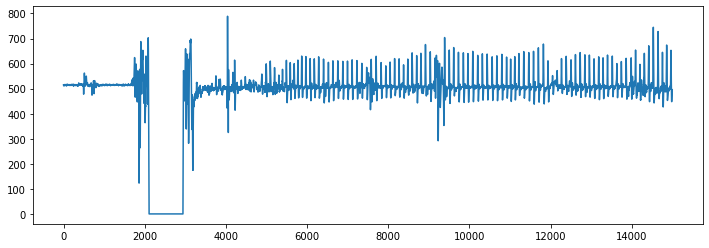

In [43]:
data, timer = hp.load_exampledata(1)

plt.figure(figsize=(12,4))
plt.plot(data)
plt.show()

bpm: 62.376304
ibi: 961.903744
sdnn: 64.613519
sdsd: 29.871930
rmssd: 57.069746
pnn20: 0.797297
pnn50: 0.486486
hr_mad: 47.010333
sd1: 40.344402
sd2: 81.621935
s: 10345.227446
sd1/sd2: 0.494284
breathingrate: 0.266667


<Figure size 864x288 with 0 Axes>

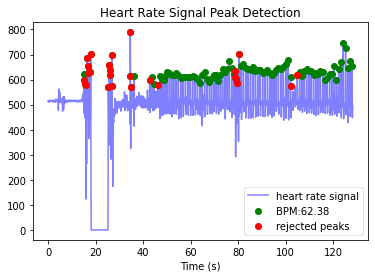

In [44]:
sample_rate = hp.get_samplerate_mstimer(timer)

wd, m = hp.process(data, sample_rate)

#plot
plt.figure(figsize=(12,4))
hp.plotter(wd, m)

#display measures computed
for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

In [31]:
data, timer = hp.load_exampledata(2)

print(timer[0])

2016-11-24 13:58:58.081000


In [32]:
sample_rate = hp.get_samplerate_datetime(timer, timeformat='%Y-%m-%d %H:%M:%S.%f')

print('sample rate is: %f Hz' %sample_rate)

sample rate is: 100.419711 Hz



Finished in 0.469463 sec
bpm: 97.325149
ibi: 616.490194
sdnn: 57.916589
sdsd: 30.173744
rmssd: 38.181375
pnn20: 0.320281
pnn50: 0.086345
hr_mad: 29.874613
sd1: 26.997110
sd2: 75.178572
s: 6376.189507
sd1/sd2: 0.359106
breathingrate: 0.141844


<Figure size 864x288 with 0 Axes>

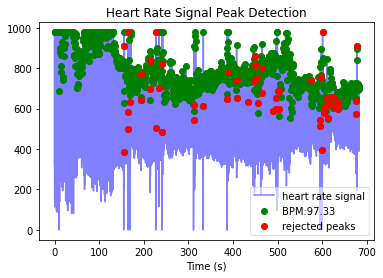

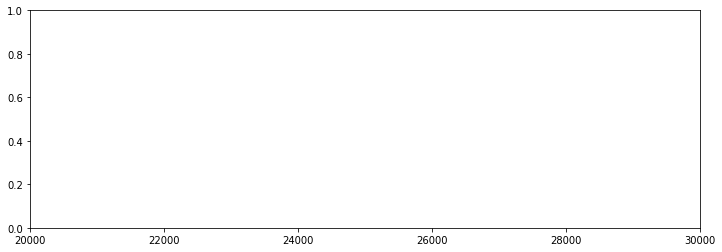

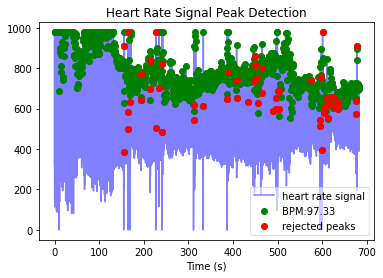

In [33]:
wd, m = hp.process(data, sample_rate, report_time = True)

#plot
plt.figure(figsize=(12,4))
hp.plotter(wd, m)

#let's zoom in on a bit
plt.figure(figsize=(12,4))
plt.xlim(20000, 30000)
hp.plotter(wd, m)

#display measures computed
for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))